In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

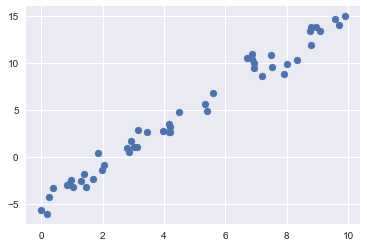

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

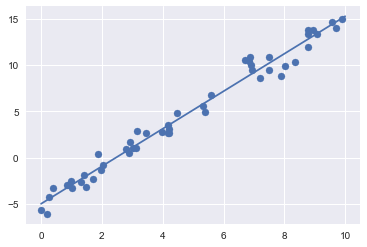

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [15]:
print("slope:", model.coef_[0])
print("Intercept:", model.intercept_)

slope: 2.027208810360695
Intercept: -4.998577085553202


In [17]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100,3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


In [19]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([2, 3, 4])

poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[4.17022005e+00, 1.73907352e+01, 7.25231927e+01],
       [7.20324493e+00, 5.18867376e+01, 3.73752880e+02],
       [1.14374817e-03, 1.30815988e-06, 1.49620548e-09],
       [3.02332573e+00, 9.14049845e+00, 2.76347041e+01],
       [1.46755891e+00, 2.15372915e+00, 3.16072440e+00],
       [9.23385948e-01, 8.52641608e-01, 7.87317280e-01],
       [1.86260211e+00, 3.46928663e+00, 6.46190062e+00],
       [3.45560727e+00, 1.19412216e+01, 4.12641722e+01],
       [3.96767474e+00, 1.57424429e+01, 6.24608929e+01],
       [5.38816734e+00, 2.90323473e+01, 1.56431145e+02],
       [4.19194514e+00, 1.75724041e+01, 7.36625540e+01],
       [6.85219500e+00, 4.69525764e+01, 3.21728209e+02],
       [2.04452250e+00, 4.18007224e+00, 8.54625174e+00],
       [8.78117436e+00, 7.71090232e+01, 6.77107778e+02],
       [2.73875932e-01, 7.50080261e-02, 2.05428931e-02],
       [6.70467510e+00, 4.49526682e+01, 3.01393035e+02],
       [4.17304802e+00, 1.74143298e+01, 7.26708346e+01],
       [5.58689828e+00, 3.12134

In [21]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

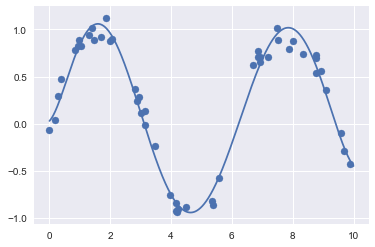

In [23]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [32]:
# predicting bicycle traffic

import pandas as pd
import numpy as np

counts = pd.read_csv('E:/Python/Data/Fremont_Bridge.csv',
                    index_col = 'Date', parse_dates=True)

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

In [35]:
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [40]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [41]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012','2016')
daily = daily.join(pd.Series(1, index = holidays, name = 'holiday'))
daily['holiday'].fillna(0, inplace = True)

ValueError: columns overlap but no suffix specified: Index(['holiday'], dtype='object')

In [47]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


(8, 17)

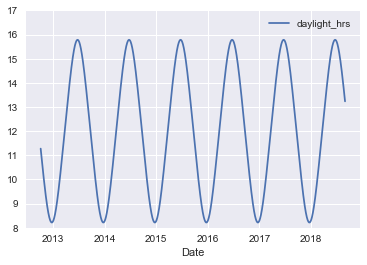

In [50]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [52]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,annual
Date,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.010959


In [54]:
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'annual']

X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept = False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

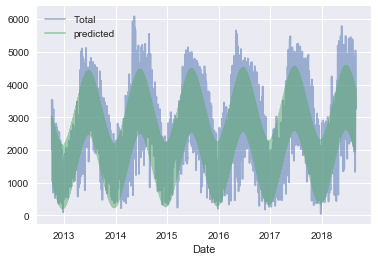

In [55]:
daily[['Total', 'predicted']].plot(alpha=0.5);